# CREDIT  Prediction Project

Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection
Exploratory data analysis
Data Cleaning
Data Pre-Processing
Model Training
Choose best model

# Problem Statement: Estimating the Risk of Funding a Consumer's Purchase or Dealing with a Merchant

Context

Financial institutions, payment providers, and fintech companies must accurately assess the risk associated with funding consumer purchases and onboarding merchants. Failure to estimate risk correctly can lead to increased loan defaults, fraud, and financial losses.

This challenge requires a machine learning-driven risk assessment system that can dynamically score consumers and merchants based on historical data, transaction behaviors, and financial trends.

# Key Challenges

1. Consumer Credit Risk

- How can we predict whether a consumer will default on a payment?
- How can we balance seamless payment experiences with effective risk minimization?

2. Merchant Risk Evaluation

- How can we assess the credibility of a merchant before onboarding?
- How can we detect high-risk businesses that may engage in fraudulent activities?

3. Fraud Detection

- How can we prevent fraudulent transactions while allowing legitimate ones?
- How can we identify suspicious transaction patterns in real time?

4. Regulatory Compliance
How can we ensure risk assessment models align with financial regulations?
How can we apply Explainable AI (XAI) to ensure transparency in decision-making?

2) Data Collection.

- https://www.kaggle.com/datasets/laotse/credit-risk-dataset

- The data consists of 32581 Rows and 12 Columns

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import matplotlib as mpl
import plotly.figure_factory as ff
import plotly.graph_objects as go


# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data=pd.read_csv("credit_risk_dataset.csv")

In [4]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.shape

(32581, 12)

In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


3. EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

We have 4 categorical features : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64
---------------------------
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: proportion, dtype: float64
---------------------------
loan_grade
A    33.077561
B    32.076977
C    19.821368
D    11.129186
E     2.958780
F     0.739695
G     0.196434
Name: proportion, dtype: float64
---------------------------
cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64
---------------------------


✅ Most applicants rent their homes (50.48%), suggesting financial constraints.
✅ Top loan reasons are education (19.81%) and medical (18.63%), both of which have lower risk.
✅ Loan grades A & B (65.16%) dominate, indicating good credit quality in most borrowers.
✅ 17.63% of applicants have previously defaulted, requiring additional screening.

Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

Bivariate Analysis: The analysis of two variables.
Multivariate Analysis: The analysis of two or more variables.

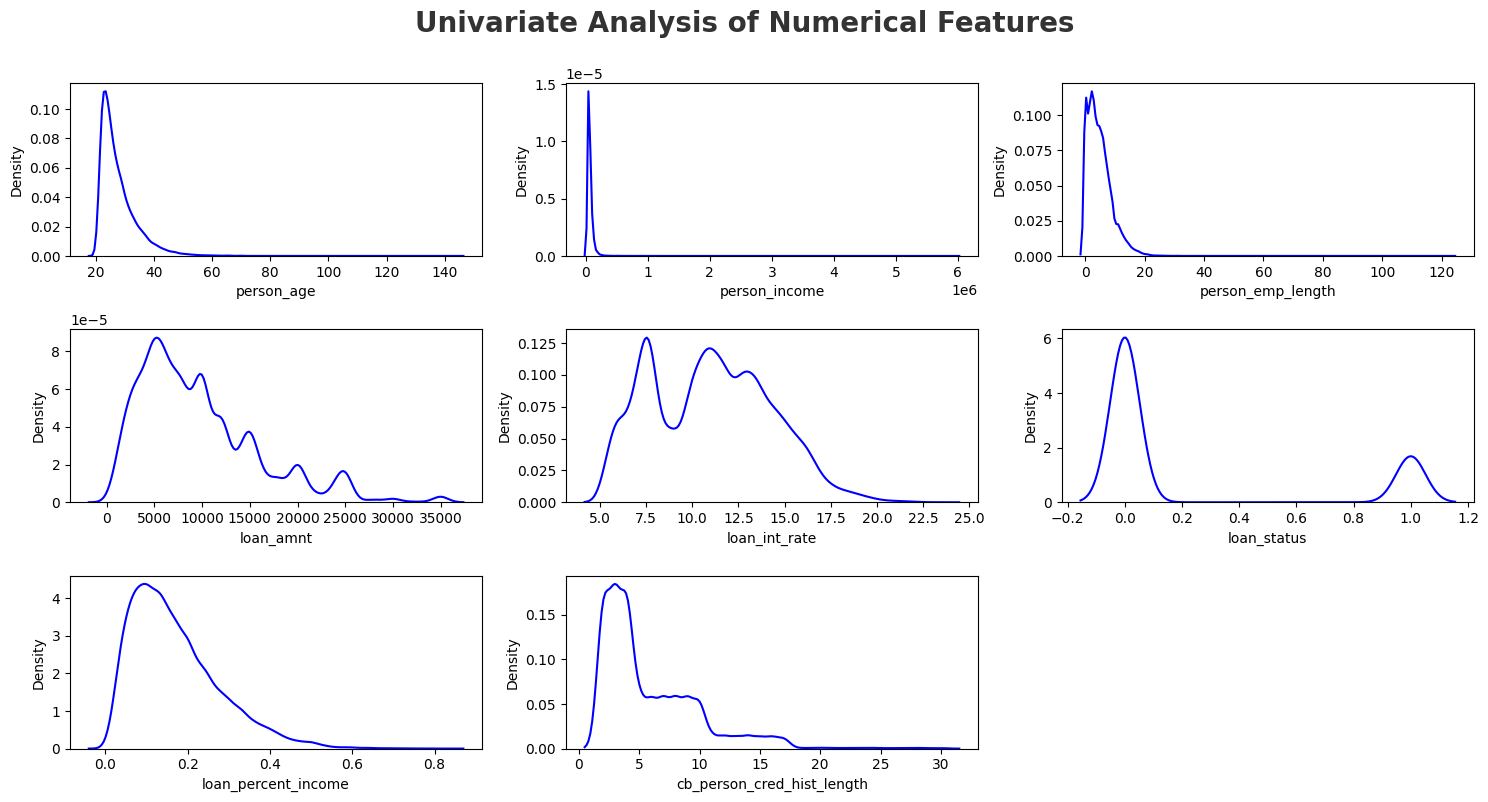

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numeric_features = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Assuming `data` is your DataFrame
num_features = len(numeric_features)
rows = (num_features // 3) + (num_features % 3)  # Dynamically set rows
cols = min(num_features, 3)  # Limit to 3 columns for better visualization

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(num_features):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(x=data[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


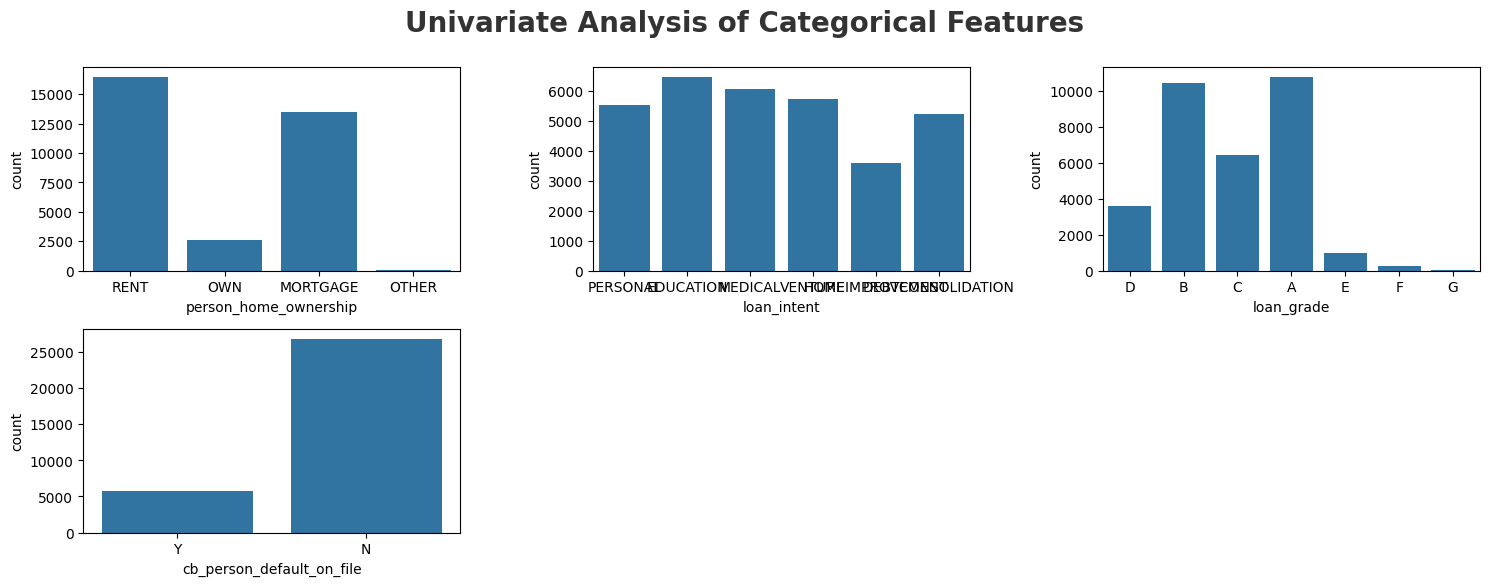

In [13]:
# categorical columns

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

1. person_home_ownership
Observation: The most common category is RENT, followed by MORTGAGE.
Possible Insight: Many loan applicants are renters, suggesting that they might not have significant collateral assets.


2. loan_intent
Observation: The most common loan purposes are EDUCATION, MEDICAL, and VENTURE. HOME IMPROVEMENT loans are the least frequent.
Possible Insight: This could suggest that most borrowers seek loans for personal or business investments rather than home-related expenses.

3. loan_grade
Observation: Most loans fall in Grade A and B, meaning they are considered low-risk. Grades E, F, and G are rare.
Possible Insight: Lenders may be approving loans to safer borrowers, or riskier loans (Grades E-G) might have higher rejection rates.

4. cb_person_default_on_file
Observation: A large majority of applicants have no prior defaults (N), while a smaller portion has defaulted before (Y).
Possible Insight: This could suggest that loan eligibility criteria are strict, favoring those with clean credit histories.

Key Takeaways
✅ Renters dominate the dataset, which might indicate limited collateral for securing loans.
✅ Education, medical, and venture loans are common, indicating demand in these areas.
✅ Most borrowers have good credit scores, meaning riskier borrowers may struggle to get approved.










In [4]:

#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

In [14]:
discrete_features=[feature for feature in numeric_features if len(data[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(data[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['loan_status']

We have 7 continuous_features : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


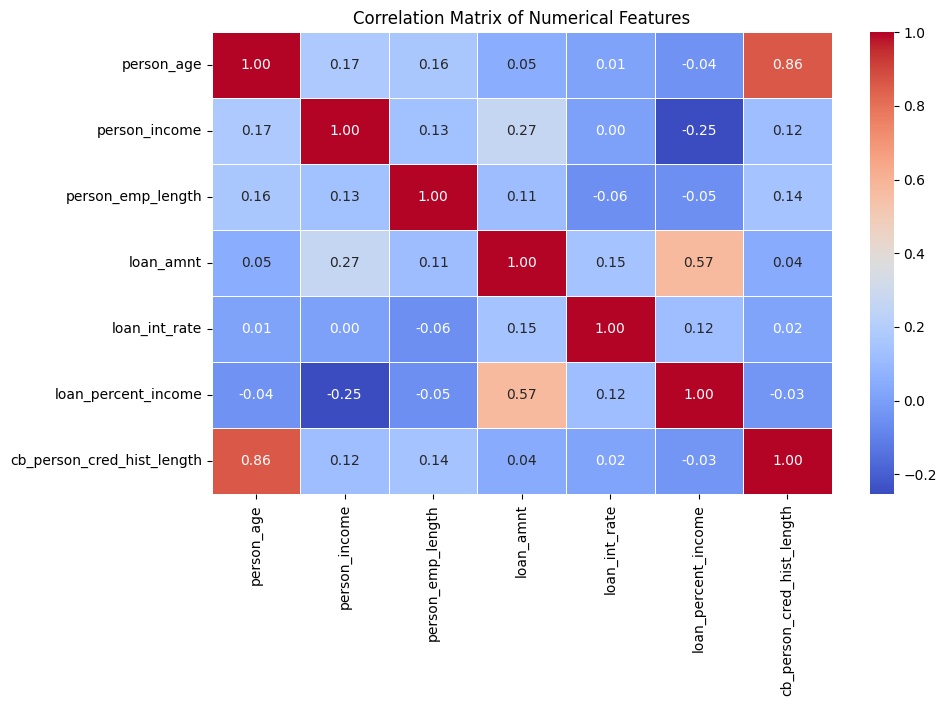

In [15]:
# Define numerical features
numerical_features = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Compute correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

We have 1 discrete features : ['loan_status']

We have 7 continuous_features : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


# Key Observations from the Heatmap:

High Correlation (> 0.8):

person_age & cb_person_cred_hist_length (0.86)
Interpretation: Older individuals tend to have longer credit histories.
Action: Consider removing one of these features if both contribute similar information.
Moderate Correlation (0.5 - 0.7):

loan_amnt & loan_percent_income (0.57)
Interpretation: Loan amount is related to how much of a person's income is dedicated to the loan.
Action: Check for collinearity effects in regression models.

# Check Multicollinearity for Categorical features

A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [21]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['loan_status'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,person_home_ownership,Reject Null Hypothesis
1,loan_intent,Reject Null Hypothesis
2,loan_grade,Reject Null Hypothesis
3,cb_person_default_on_file,Reject Null Hypothesis


Since we rejected the null hypothesis for all features, it means that each of these categorical features has a statistically significant relationship with loan_status.
In other words, these variables are likely important predictors when modeling loan status.

# Checking Null Values

In [22]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
The missing values count in the dataset suggests that two features have missing values:

Feature	Missing Values
person_emp_length	895
loan_int_rate	3116


In [10]:
continues_features=[feature for feature in numeric_features if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


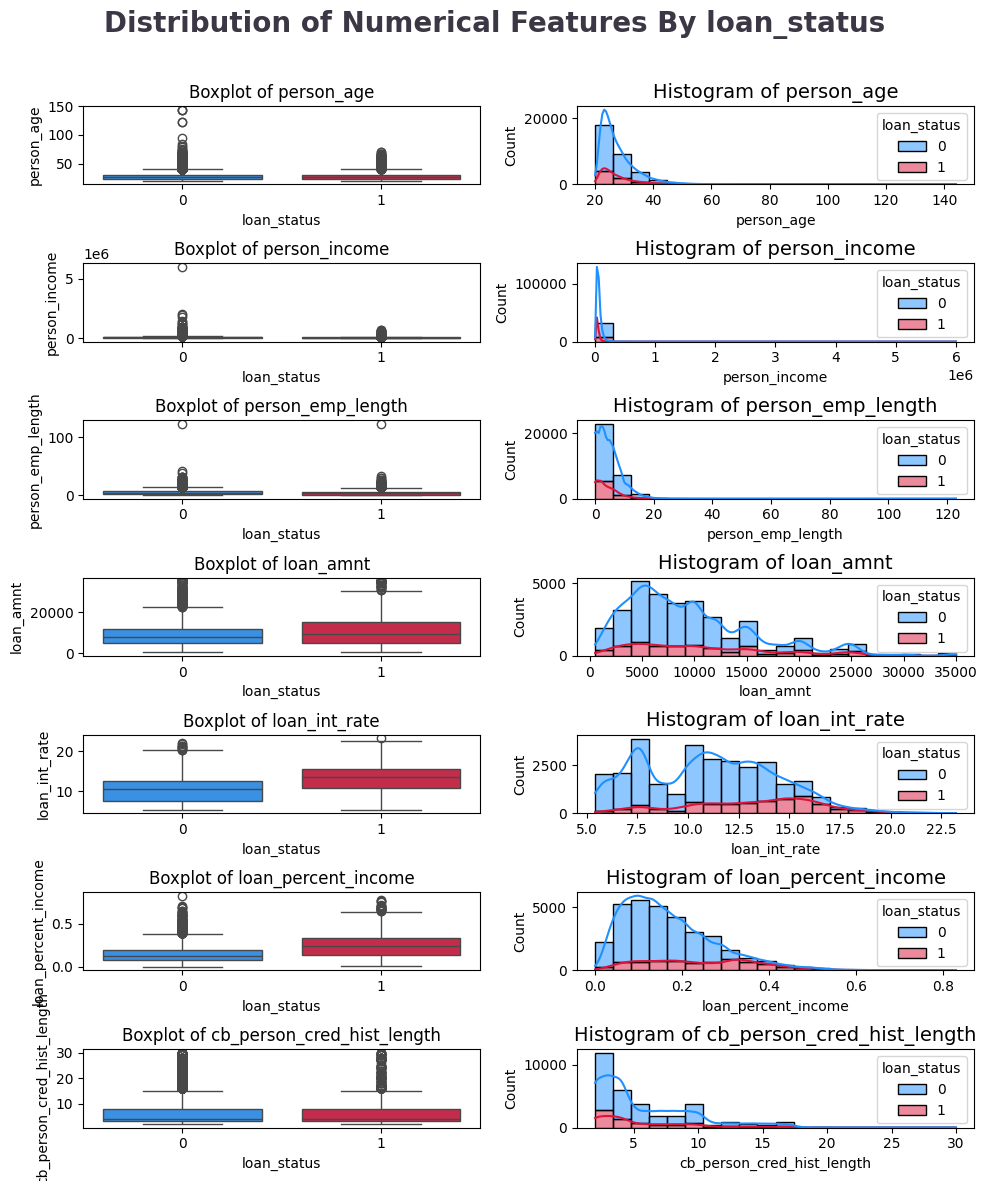

In [11]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(7, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By loan_status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=data, x='loan_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=data, x=col, hue='loan_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

4 Visualization
4.1 Visualize the Target Feature

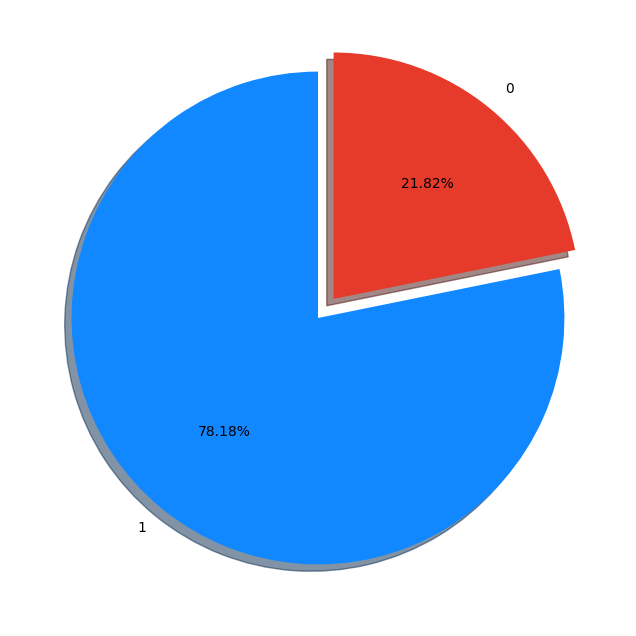

In [13]:
percentage = data.loan_status.value_counts(normalize=True)*100
labels = ["1","0"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

4.2 Does applicant Age has any impact on Loan Approval ?

In [14]:

data.groupby('person_age')['loan_status'].value_counts(normalize=True).to_frame()*100

proportion
person_age loan_status            
20         0             86.666667
           1             13.333333
21         0             69.731489
           1             30.268511
22         0             75.667492
...                            ...
80         0            100.000000
84         0            100.000000
94         0            100.000000
123        0            100.000000
144        0            100.000000

[105 rows x 1 columns]

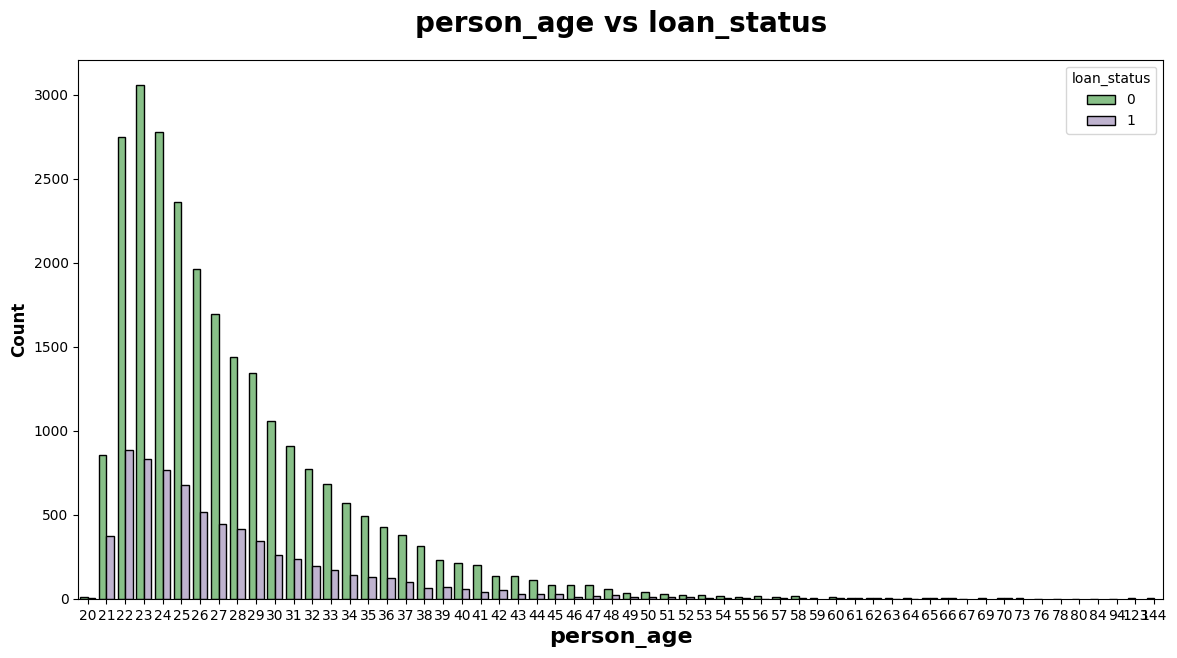

In [15]:
plt.subplots(figsize=(14,7))
sns.countplot(x="person_age",hue="loan_status", data=data, ec = "black",palette="Accent")
plt.title("person_age vs loan_status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("person_age", weight="bold", fontsize=16)
plt.legend(title="loan_status", fancybox=True)
plt.show()

In [17]:
mpl.renderers.default = "json"
fig.show()




More GRAPHS

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.set_style("whitegrid")
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.set_style("whitegrid")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=11)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [45]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation = 60)
    plt.show()

In [27]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.set_style("whitegrid")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.set_style("whitegrid")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.set_style("whitegrid")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.set_style("whitegrid")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

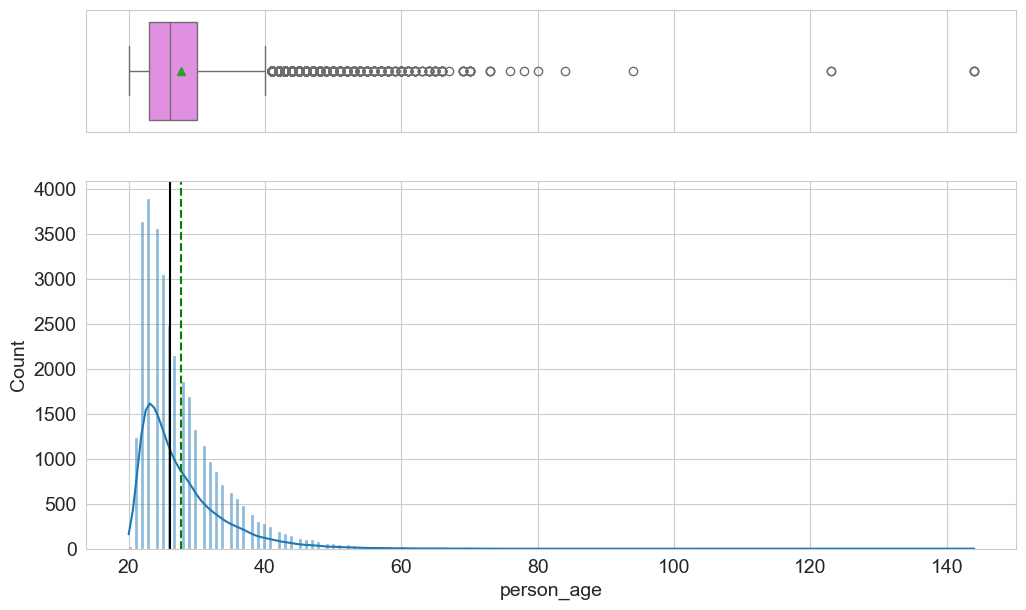

In [31]:
sns.set_style("whitegrid")
histogram_boxplot(data, "person_age", kde=True)

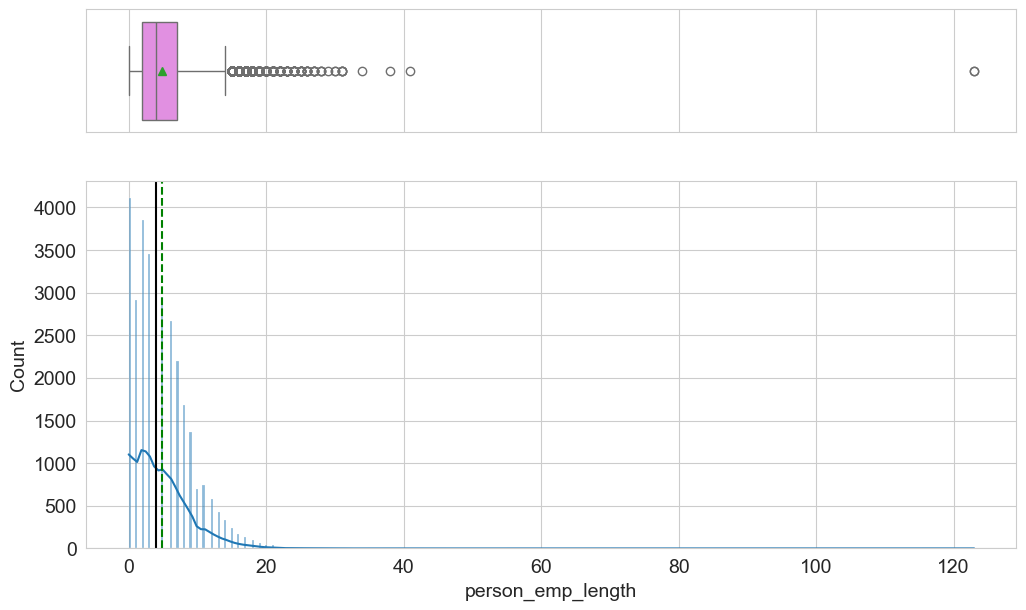

In [33]:
sns.set_style("whitegrid")
histogram_boxplot(data, "person_emp_length", kde=True)

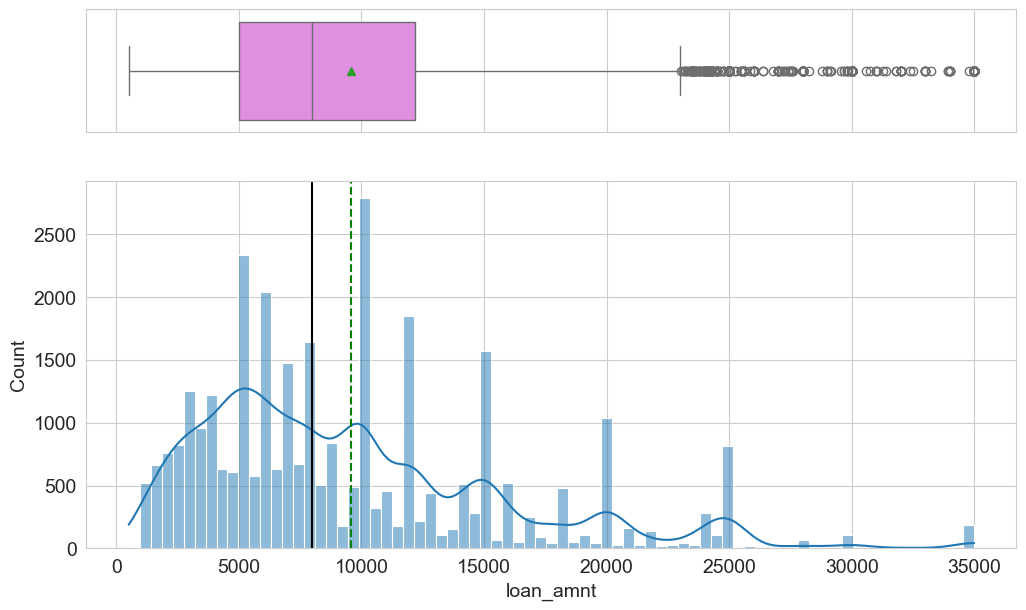

In [34]:
sns.set_style("whitegrid")
histogram_boxplot(data, "loan_amnt", kde=True)

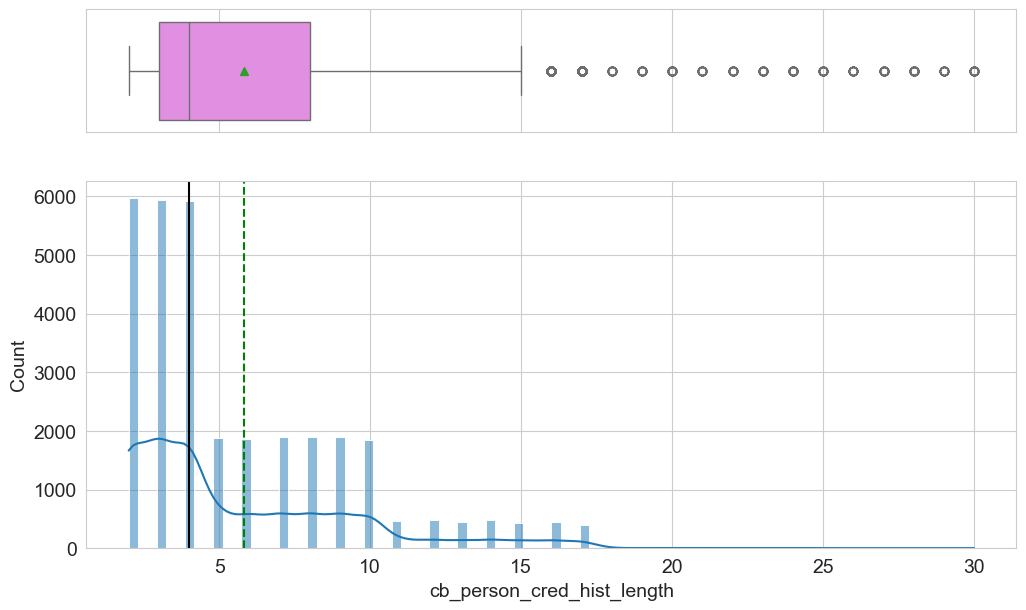

In [36]:
sns.set_style("whitegrid")
histogram_boxplot(data, "cb_person_cred_hist_length", kde=True)


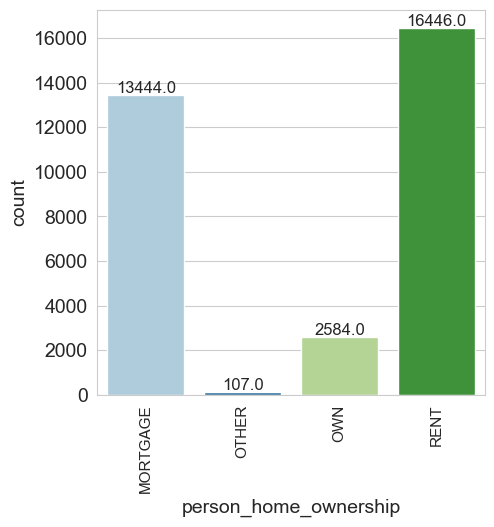

In [37]:
labeled_barplot(data, "person_home_ownership")

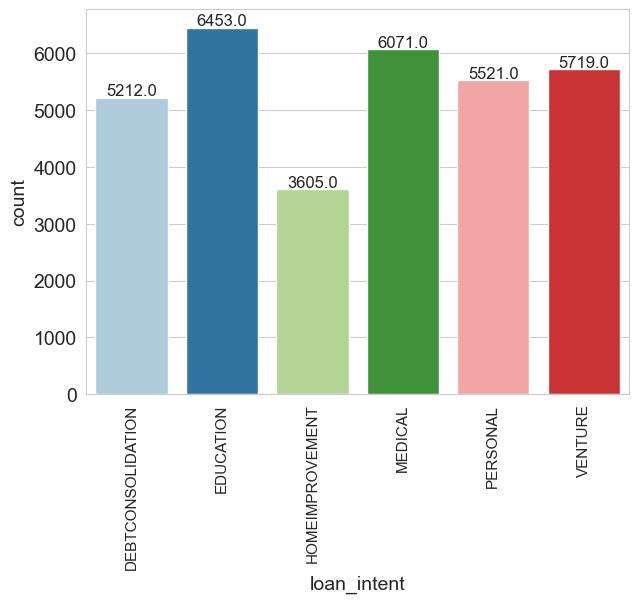

In [39]:
labeled_barplot(data, "loan_intent")

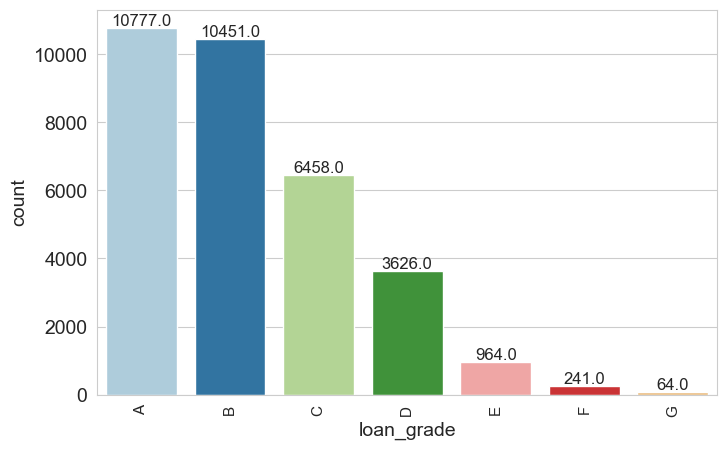

In [40]:
labeled_barplot(data, "loan_grade")

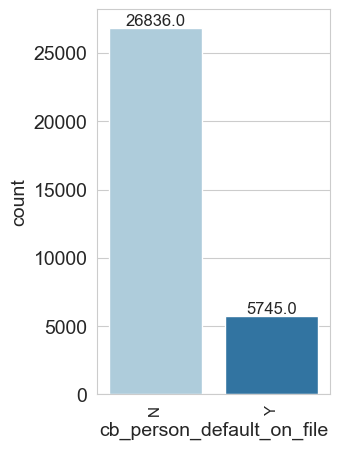

In [41]:
labeled_barplot(data, "cb_person_default_on_file")

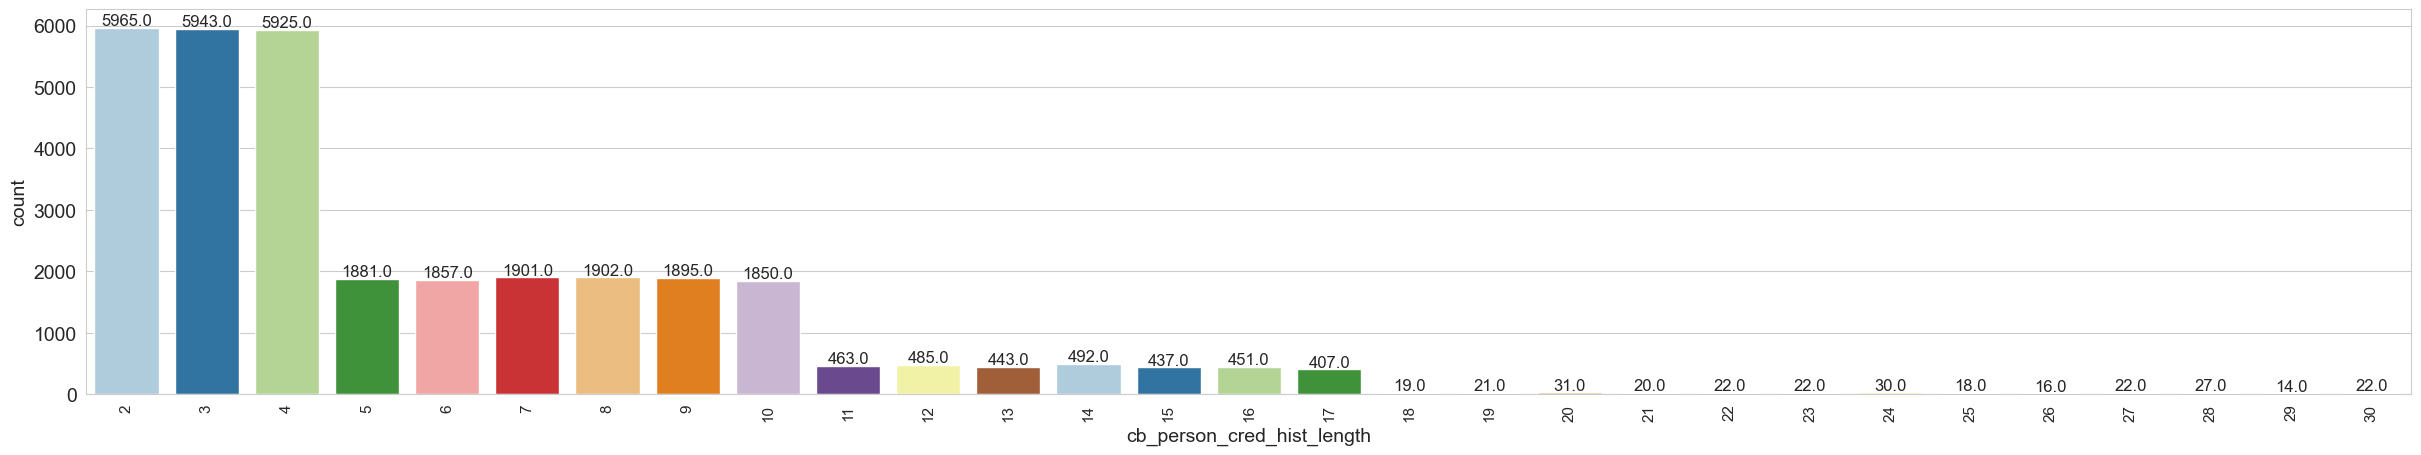

In [42]:
labeled_barplot(data, "cb_person_cred_hist_length")

In [ ]:
replaceStruct = {
                "cb_person_default_on_file":     {"N": 0, "Y": 1 },
                "loan_grade": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7},
                "loan_intent": {"EDUCATION": 1, "MEDICAL": 2, "VENTURE": 3, "PERSONAL": 4, "DEBTCONSOLIDATION": 5, "HOMEIMPROVEMENT": 6},
                "person_home_ownership": {"RENT": 1, "MORTGAGE": 2, "OWN": 3, "OTHER":4}, }

person_home_ownership  MORTGAGE  OTHER   OWN   RENT    All
loan_status                                               
All                       13444    107  2584  16446  32581
0                         11754     74  2391  11254  25473
1                          1690     33   193   5192   7108
------------------------------------------------------------------------------------------------------------------------


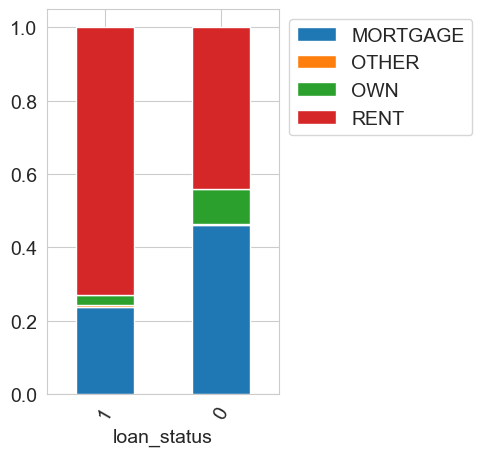

In [46]:
stacked_barplot(data,"loan_status", "person_home_ownership")

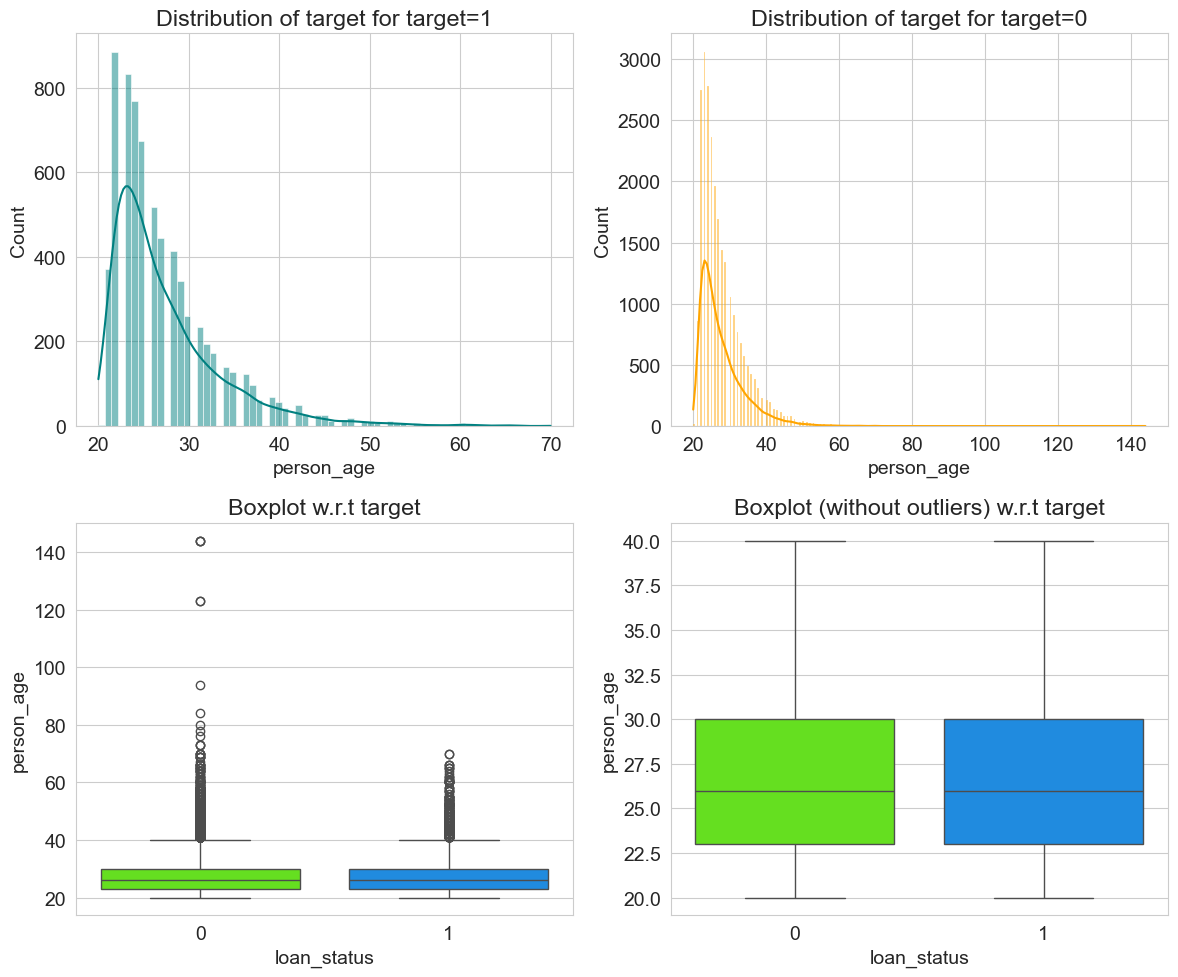

In [48]:
distribution_plot_wrt_target(data, "person_age", "loan_status")

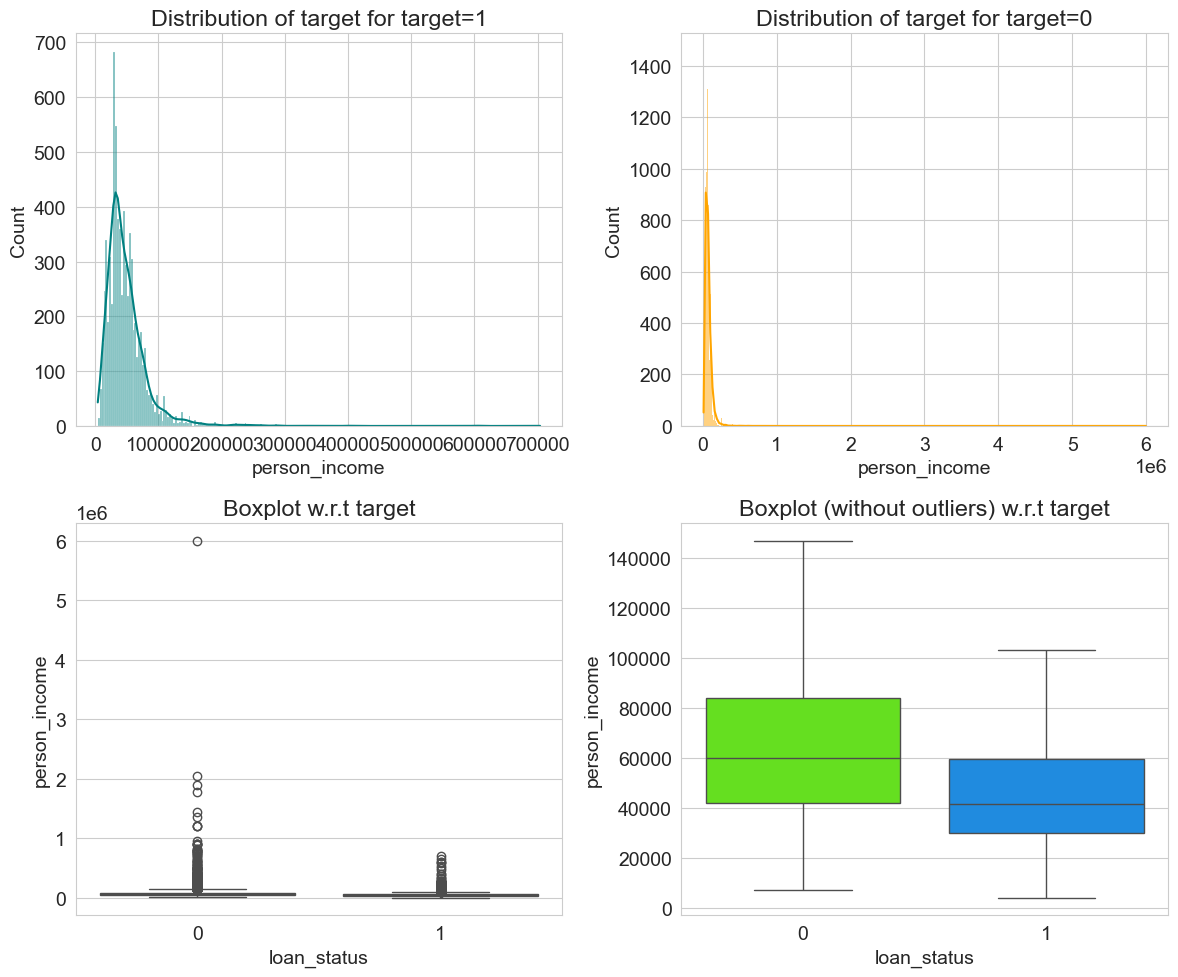

In [49]:
distribution_plot_wrt_target(data, "person_income", "loan_status")

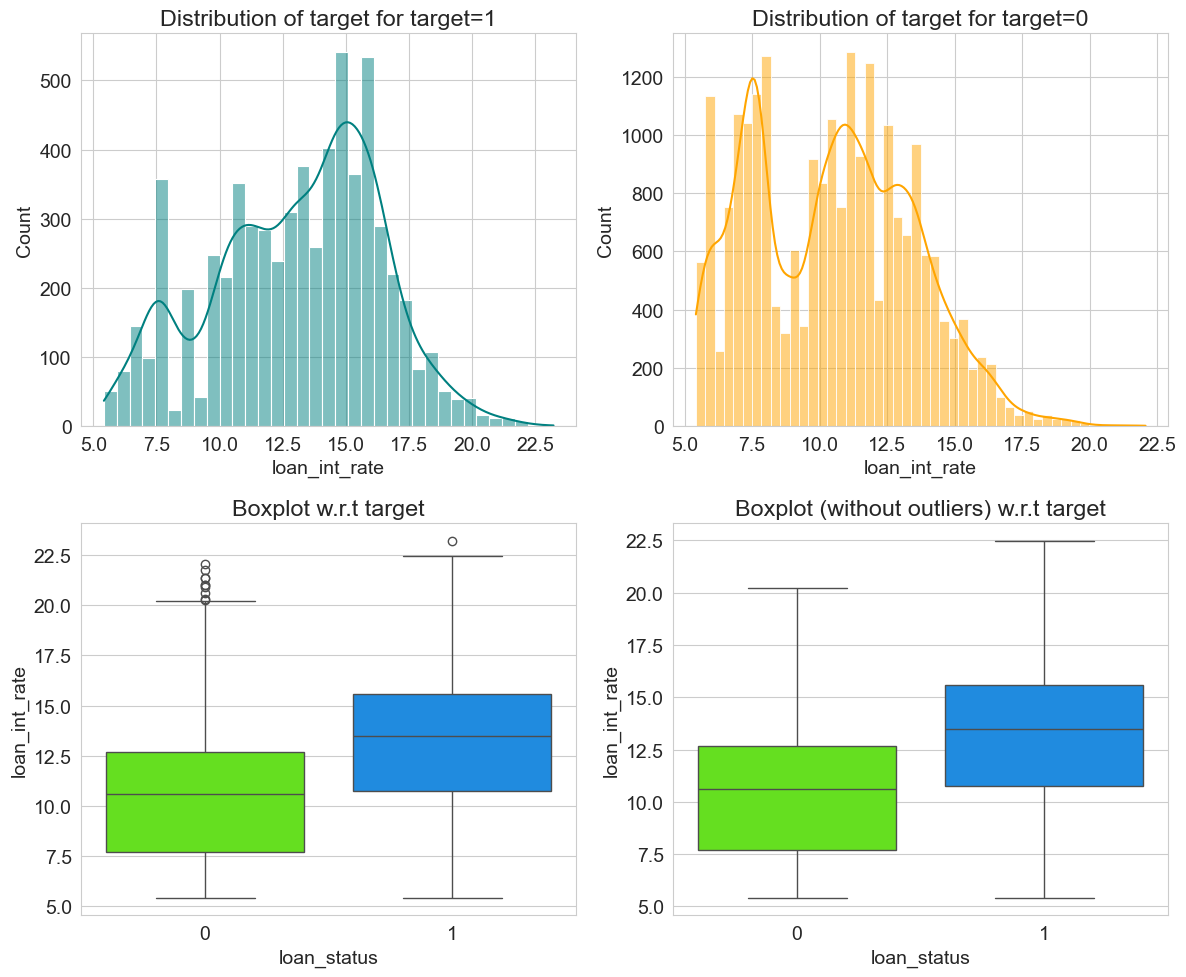

In [50]:
distribution_plot_wrt_target(data, "loan_int_rate", "loan_status")